In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision = 2)

In [7]:
bit_rate = 1e6
fc = 848e6
freq_0 = 2.0e6
freq_1 = 2.6e6

tmax = 0.1 # secs
fsps = 20e6
N = round(tmax * fsps)

In [8]:
t = np.linspace(0, N, N)
s = np.zeros(N)

bit_period = 1 / bit_rate
bit_samps = fsps / bit_rate

for i in range(N):
    f = 0
    if (i % 2 == 0):
        f = freq_0
    else:
        f = freq_1

    l = round(i * bit_samps)
    r = round((i + 1) * bit_samps)
    s[l:r] = (1 + np.sign(np.sin(2 * np.pi * f / fsps * t[l:r]))) / 2

In [9]:
bit_samps

20.0

(0.0, 100.0)

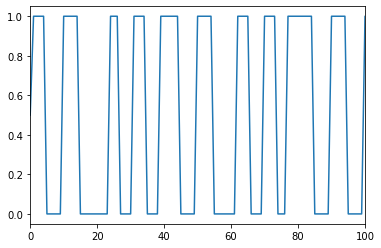

In [11]:
plt.plot(s)
plt.xlim(0,bit_samps * 5)

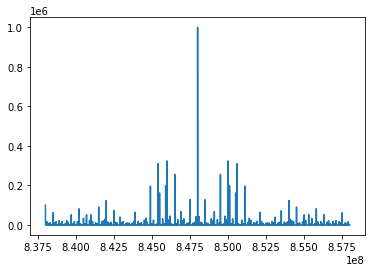

In [13]:
nyquist = fsps / 2
freqs = np.linspace(fc - nyquist, fc + nyquist, N)
fft = np.fft.fftshift(np.fft.fft(s))
plt.plot(freqs, np.abs(fft))